In [1]:
# Calling libraries to graph (Matplotlib), dataframe(pandas) and numerical data(numpy)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as stats

In [2]:
#Reading csv data files and mergin the data into one data frame
clinicaltrial = "clinicaltrial_data.csv"
clinicaltrial_df = pd.read_csv(clinicaltrial, low_memory=False)
medicatedmouse = "mouse_drug_data.csv"
medicatedmouse_df = pd.read_csv(medicatedmouse, low_memory=False)
labtrial = pd.merge(clinicaltrial_df, medicatedmouse_df, how="left", on=["Mouse ID", "Mouse ID"])
labtrial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
#Selecting data for the change in tumor volume
dftest1= labtrial.groupby(['Drug','Timepoint']).mean()[["Tumor Volume (mm3)"]]

In [4]:
dftest1.reset_index(inplace=True)

In [5]:
dftest1.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
#Second test, calculating the error from the Test1 measurements in mean of volume change
dftest2= labtrial.groupby(['Drug','Timepoint']).sem()[["Tumor Volume (mm3)"]]

In [7]:
dftest2.reset_index(inplace=True)

In [8]:
dftest2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
dftest2= labtrial.groupby(['Drug','Timepoint']).sem()[["Tumor Volume (mm3)"]]

In [10]:
#Shacking the data to get the columns with the errors accross the time of the experiment.
dftest2.unstack().unstack().unstack()

Drug                          Capomulin  Ceftamin  Infubinol  Ketapril  \
                   Timepoint                                             
Tumor Volume (mm3) 0           0.000000  0.000000   0.000000  0.000000   
                   5           0.448593  0.164505   0.235102  0.264819   
                   10          0.702684  0.236144   0.282346  0.357421   
                   15          0.838617  0.332053   0.357705  0.580268   
                   20          0.909731  0.359482   0.476210  0.726484   
                   25          0.881642  0.439356   0.550315  0.755413   
                   30          0.934460  0.490620   0.631061  0.934121   
                   35          1.052241  0.692248   0.984155  1.127867   
                   40          1.223608  0.708505   1.055220  1.158449   
                   45          1.223977  0.902358   1.144427  1.453186   

Drug                          Naftisol   Placebo  Propriva  Ramicane  \
                   Timepoint                                           
Tumor Volume (mm3) 0          0.000000  0.000000  0.000000  0.000000   
                   5          0.202385  0.218091  0.231708  0.482955   
                   10         0.319415  0.402064  0.376195  0.720225   
                   15         0.444378  0.614461  0.466109  0.770432   
                   20         0.595260  0.839609  0.555181  0.786199   
                   25         0.813706  1.034872  0.577401  0.746991   
                   30         0.975496  1.218231  0.746045  0.864906   
                   35         1.013769  1.287481  1.084929  0.967433   
                   40         1.118567  1.370634  1.564779  1.128445   
                   45         1.416363  1.351726  1.888586  1.226805   

Drug                          Stelasyn  Zoniferol  
                   Timepoint                       
Tumor Volume (mm3) 0          0.000000   0.000000  
                   5          0.239862   0.188950  
                   10         0.433678   0.263949  
                   15         0.493261   0.370544  
                   20         0.621889   0.533182  
                   25         0.741922   0.602513  
                   30         0.899548   0.800043  
                   35         1.003186   0.881426  
                   40         1.410435   0.998515  
                   45         1.576556   1.003576

In [11]:
#Creating dataframe with the past information on test2 for the error calculation
sem=(dftest2.unstack().unstack().unstack()).iloc[:,]

In [12]:
# Getting dataframe to munging data changing the columns into row
dftest1= labtrial.groupby(['Drug','Timepoint']).mean()[["Tumor Volume (mm3)"]]

In [13]:
#Data Munging to arrange the dataframe  with Tumor Volume versus time of the 
#experimental trial.
dftest1.unstack().unstack().unstack()

Drug                          Capomulin   Ceftamin  Infubinol   Ketapril  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          44.266086  46.503051  47.062001  47.389175   
                   10         43.084291  48.285125  49.403909  49.582269   
                   15         42.064317  50.094055  51.296397  52.399974   
                   20         40.716325  52.157049  53.197691  54.920935   
                   25         39.939528  54.287674  55.715252  57.678982   
                   30         38.769339  56.769517  58.299397  60.994507   
                   35         37.816839  58.827548  60.742461  63.371686   
                   40         36.958001  61.467895  63.162824  66.068580   
                   45         36.236114  64.132421  65.755562  70.662958   

Drug                           Naftisol    Placebo   Propriva   Ramicane  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          46.796098  47.125589  47.248967  43.944859   
                   10         48.694210  49.423329  49.101541  42.531957   
                   15         50.933018  51.359742  51.067318  41.495061   
                   20         53.644087  54.364417  53.346737  40.238325   
                   25         56.731968  57.482574  55.504138  38.974300   
                   30         59.559509  59.809063  58.196374  38.703137   
                   35         62.685087  62.420615  60.350199  37.451996   
                   40         65.600754  65.052675  63.045537  36.574081   
                   45         69.265506  68.084082  66.258529  34.955595   

Drug                           Stelasyn  Zoniferol  
                   Timepoint                        
Tumor Volume (mm3) 0          45.000000  45.000000  
                   5          47.527452  46.851818  
                   10         49.463844  48.689881  
                   15         51.529409  50.779059  
                   20         54.067395  53.170334  
                   25         56.166123  55.432935  
                   30         59.826738  57.713531  
                   35         62.440699  60.089372  
                   40         65.356386  62.916692  
                   45         68.438310  65.960888

In [14]:
#Creating dataframe with the tumor volume change accross the time of the experiment.
values=(dftest1.unstack().unstack().unstack()).iloc[:,]

<IPython.core.display.Javascript object>


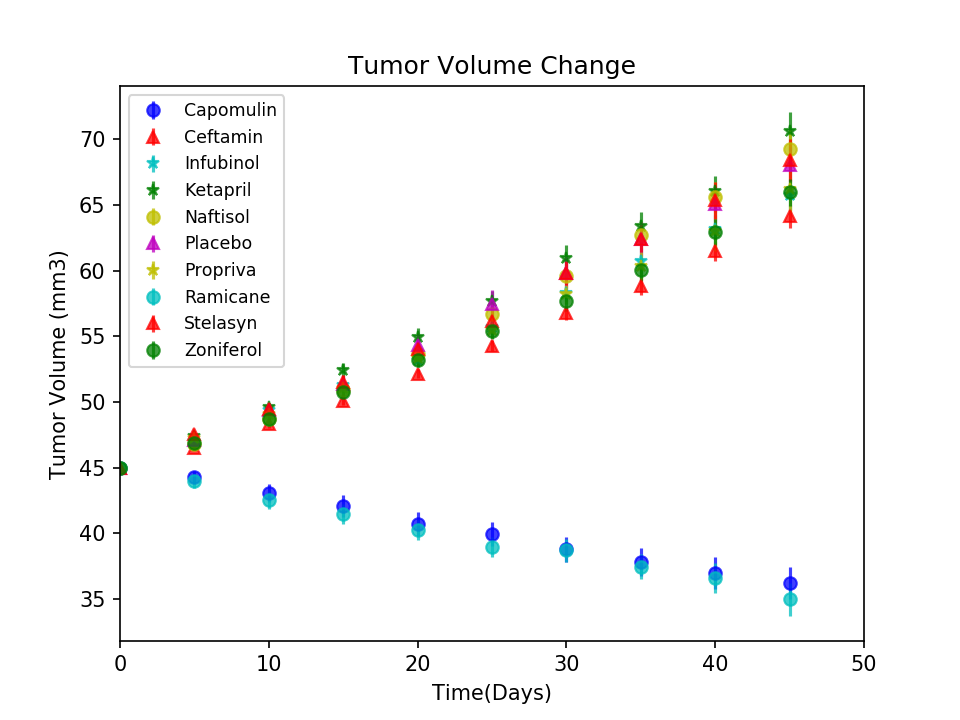

In [18]:
#Generate the plot (Tumor Volume(mm3) vs Time(Days)) with error vars
x_axis = np.arange(0,50,5)

#Intenting generate a list to try to make the graph more automatic
'''
names=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
fmtlist=['o','^','*','*','o','^','*','o','^','o']
colorlist=['b','r','c','g','y','m','y','c','r','g']
'''
fig, ax= plt.subplots()

#ax.errorbar(x_axis,values(name), yerr=sem(name), xerr=None, fmt=(fmttype), color=(colorchoice), aplha=0.75, label=(names) for name in names, fmttype in fmtlist and colorchoice in colorlist

ax.errorbar(x_axis,values["Capomulin"], yerr=sem["Capomulin"], xerr=None, fmt='o', color='b', alpha=0.75, label="Capomulin")
ax.errorbar(x_axis,values["Ceftamin"], yerr=sem["Ceftamin"], xerr=None, fmt='^', color='r', alpha=0.75, label="Ceftamin")
ax.errorbar(x_axis,values["Infubinol"], yerr=sem["Infubinol"], xerr=None, fmt='*', color='c', alpha=0.75, label="Infubinol")
ax.errorbar(x_axis,values["Ketapril"], yerr=sem["Ketapril"], xerr=None, fmt='*', color='g', alpha=0.75, label="Ketapril")
ax.errorbar(x_axis,values["Naftisol"], yerr=sem["Naftisol"], xerr=None, fmt='o', color='y', alpha=0.75, label="Naftisol")
ax.errorbar(x_axis,values["Placebo"], yerr=sem["Placebo"], xerr=None, fmt='^', color='m', alpha=0.75, label="Placebo")
ax.errorbar(x_axis,values["Propriva"], yerr=sem["Propriva"], xerr=None, fmt='*', color='y', alpha=0.75, label="Propriva")
ax.errorbar(x_axis,values["Ramicane"], yerr=sem["Ramicane"], xerr=None, fmt='o', color='c', alpha=0.75, label="Ramicane")
ax.errorbar(x_axis,values["Stelasyn"], yerr=sem["Stelasyn"], xerr=None, fmt='^', color='r', alpha=0.75, label="Stelasyn")
ax.errorbar(x_axis,values["Zoniferol"], yerr=sem["Zoniferol"], xerr=None, fmt='o', color='g', alpha=0.75, label="Zoniferol")

ax.set_xlim(0,50)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Change")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("Tumor Volume Change.png")
plt.show()

In [ ]:
'''
In Figure 2 is observable which drug is more effective in the tumor reduction, the most effective one is Ramicane
with a error bar smaller than the one presented in the Ketrapil drug where data is more representative of the mean 
value. Even with those differences is clear that the tumor is being affected in positive way in Capomulin and Ramicane
drug use.
'''

In [20]:
# Storing the mean Metastatic data, grouped by Drug and Timepoint, lab analysis in test 3
dftest3= labtrial.groupby(['Drug','Timepoint']).mean()[["Metastatic Sites"]]

In [21]:
dftest3.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [23]:
#Caluclating the Standard error associated with the mean of the Metastatic data:
dftest4= labtrial.groupby(['Drug','Timepoint']).sem()[["Metastatic Sites"]]

In [24]:
dftest4.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [29]:
dftest3.reset_index(inplace=True)
dftest4.reset_index(inplace=True)

In [35]:
dftest3= labtrial.groupby(['Drug','Timepoint']).mean()[["Metastatic Sites"]]

In [41]:
#It has used the transponse on a transpose and pivoting
dftest3.unstack().unstack().unstack()

Drug                        Capomulin  Ceftamin  Infubinol  Ketapril  \
                 Timepoint                                             
Metastatic Sites 0           0.000000  0.000000   0.000000  0.000000   
                 5           0.160000  0.380952   0.280000  0.304348   
                 10          0.320000  0.600000   0.666667  0.590909   
                 15          0.375000  0.789474   0.904762  0.842105   
                 20          0.652174  1.111111   1.050000  1.210526   
                 25          0.818182  1.500000   1.277778  1.631579   
                 30          1.090909  1.937500   1.588235  2.055556   
                 35          1.181818  2.071429   1.666667  2.294118   
                 40          1.380952  2.357143   2.100000  2.733333   
                 45          1.476190  2.692308   2.111111  3.363636   

Drug                        Naftisol   Placebo  Propriva  Ramicane  Stelasyn  \
                 Timepoint                                                     
Metastatic Sites 0          0.000000  0.000000  0.000000  0.000000  0.000000   
                 5          0.260870  0.375000  0.320000  0.120000  0.240000   
                 10         0.523810  0.833333  0.565217  0.250000  0.478261   
                 15         0.857143  1.250000  0.764706  0.333333  0.782609   
                 20         1.150000  1.526316  1.000000  0.347826  0.952381   
                 25         1.500000  1.941176  1.357143  0.652174  1.157895   
                 30         2.066667  2.266667  1.615385  0.782609  1.388889   
                 35         2.266667  2.642857  2.300000  0.952381  1.562500   
                 40         2.466667  3.166667  2.777778  1.100000  1.583333   
                 45         2.538462  3.272727  2.571429  1.250000  1.727273   

Drug                        Zoniferol  
                 Timepoint             
Metastatic Sites 0           0.000000  
                 5           0.166667  
                 10          0.500000  
                 15          0.809524  
                 20          1.294118  
                 25          1.687500  
                 30          1.933333  
                 35          2.285714  
                 40          2.785714  
                 45          3.071429

In [42]:
dftest4= labtrial.groupby(['Drug','Timepoint']).sem()[["Metastatic Sites"]]

In [47]:
dftest4.T.unstack().unstack().unstack().T

Drug                        Capomulin  Ceftamin  Infubinol  Ketapril  \
                 Timepoint                                             
Metastatic Sites 0           0.000000  0.000000   0.000000  0.000000   
                 5           0.074833  0.108588   0.091652  0.098100   
                 10          0.125433  0.152177   0.159364  0.142018   
                 15          0.132048  0.180625   0.194015  0.191381   
                 20          0.161621  0.241034   0.234801  0.236680   
                 25          0.181818  0.258831   0.265753  0.288275   
                 30          0.172944  0.249479   0.227823  0.347467   
                 35          0.169496  0.266526   0.224733  0.361418   
                 40          0.175610  0.289128   0.314466  0.315725   
                 45          0.202591  0.286101   0.309320  0.278722   

Drug                        Naftisol   Placebo  Propriva  Ramicane  Stelasyn  \
                 Timepoint                                                     
Metastatic Sites 0          0.000000  0.000000  0.000000  0.000000  0.000000   
                 5          0.093618  0.100947  0.095219  0.066332  0.087178   
                 10         0.163577  0.115261  0.105690  0.090289  0.123672   
                 15         0.158651  0.190221  0.136377  0.115261  0.153439   
                 20         0.181731  0.234064  0.171499  0.119430  0.200905   
                 25         0.185240  0.263888  0.199095  0.119430  0.219824   
                 30         0.266667  0.300264  0.266469  0.139968  0.230641   
                 35         0.330464  0.341412  0.366667  0.145997  0.240983   
                 40         0.321702  0.297294  0.433903  0.160591  0.312815   
                 45         0.351104  0.304240  0.428571  0.190221  0.359062   

Drug                        Zoniferol  
                 Timepoint             
Metastatic Sites 0           0.000000  
                 5           0.077709  
                 10          0.109109  
                 15          0.111677  
                 20          0.166378  
                 25          0.236621  
                 30          0.248168  
                 35          0.285714  
                 40          0.299791  
                 45          0.286400

In [48]:
#Getting data from the past frames and ready to graph!
metastatic_values=(dftest3.T.unstack().unstack().unstack().T).iloc[:,]
metastatic_sem=(dftest4.T.unstack().unstack().unstack().T).iloc[:,]

<IPython.core.display.Javascript object>


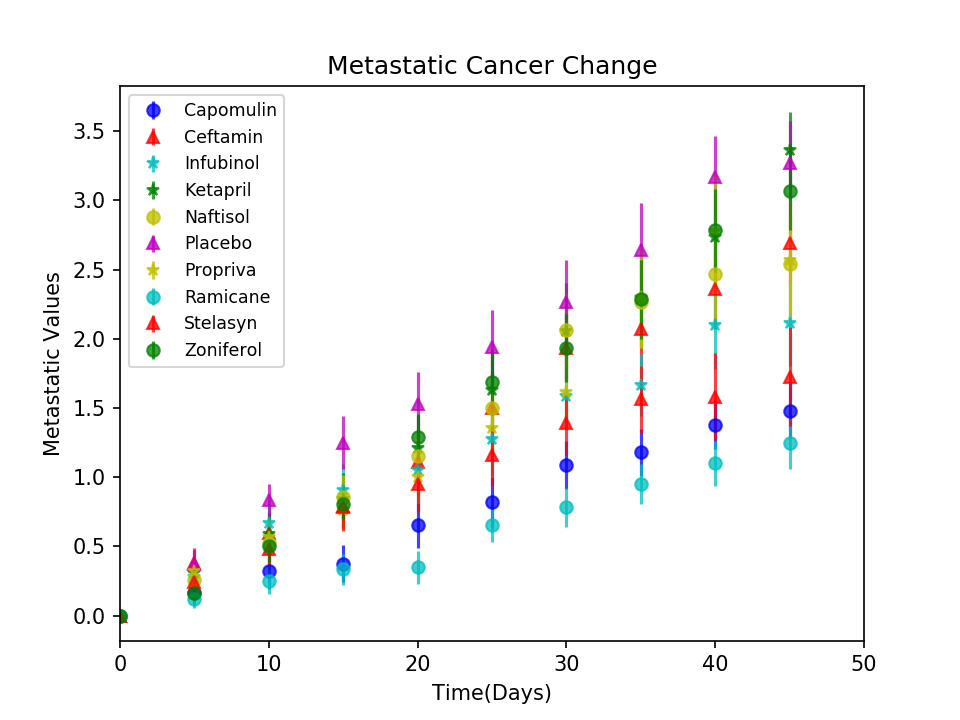

In [49]:
#Generate the plot (Metastatic Sites vs Time(Days)) with error vars
x_axis = np.arange(0,50,5)
fig, ax= plt.subplots()

ax.errorbar(x_axis,metastatic_values["Capomulin"], yerr=metastatic_sem["Capomulin"], xerr=None, fmt='o', color='b', alpha=0.75, label="Capomulin")
ax.errorbar(x_axis,metastatic_values["Ceftamin"], yerr=metastatic_sem["Ceftamin"], xerr=None, fmt='^', color='r', alpha=0.75, label="Ceftamin")
ax.errorbar(x_axis,metastatic_values["Infubinol"], yerr=metastatic_sem["Infubinol"], xerr=None, fmt='*', color='c', alpha=0.75, label="Infubinol")
ax.errorbar(x_axis,metastatic_values["Ketapril"], yerr=metastatic_sem["Ketapril"], xerr=None, fmt='*', color='g', alpha=0.75, label="Ketapril")
ax.errorbar(x_axis,metastatic_values["Naftisol"], yerr=metastatic_sem["Naftisol"], xerr=None, fmt='o', color='y', alpha=0.75, label="Naftisol")
ax.errorbar(x_axis,metastatic_values["Placebo"], yerr=metastatic_sem["Placebo"], xerr=None, fmt='^', color='m', alpha=0.75, label="Placebo")
ax.errorbar(x_axis,metastatic_values["Propriva"], yerr=metastatic_sem["Propriva"], xerr=None, fmt='*', color='y', alpha=0.75, label="Propriva")
ax.errorbar(x_axis,metastatic_values["Ramicane"], yerr=metastatic_sem["Ramicane"], xerr=None, fmt='o', color='c', alpha=0.75, label="Ramicane")
ax.errorbar(x_axis,metastatic_values["Stelasyn"], yerr=metastatic_sem["Stelasyn"], xerr=None, fmt='^', color='r', alpha=0.75, label="Stelasyn")
ax.errorbar(x_axis,metastatic_values["Zoniferol"], yerr=metastatic_sem["Zoniferol"], xerr=None, fmt='o', color='g', alpha=0.75, label="Zoniferol")

ax.set_xlim(0,50)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Metastatic Values")
plt.title("Metastatic Cancer Change")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("Metastatic Cancer Change.png")
plt.show()

In [ ]:
'''
During the trial period, is observable the growth in the Placebo drug, this is possible because placibos are 
mostly water, no medication so the metastaic cancer is on its natural growth, while the one under Ramicane 
treatment is slowing its change is slow and the cancer is not multiplying at the high visible (Placibo) rate.
'''

In [106]:
#Analysis for the number of mice alive during the laboratory trial.
dftest5= labtrial.groupby(['Drug','Timepoint']).count()[["Mouse ID"]]

In [114]:
dftest5.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [111]:
#Data visualization for alive mice during the trial
dftest5.unstack().T

Drug                Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  \
         Timepoint                                                       
Mouse ID 0                 25        25         25        25        25   
         5                 25        21         25        23        23   
         10                25        20         21        22        21   
         15                24        19         21        19        21   
         20                23        18         20        19        20   
         25                22        18         18        19        18   
         30                22        16         17        18        15   
         35                22        14         12        17        15   
         40                21        14         10        15        15   
         45                21        13          9        11        13   

Drug                Placebo  Propriva  Ramicane  Stelasyn  Zoniferol  
         Timepoint                                                    
Mouse ID 0               25        26        25        26         25  
         5               24        25        25        25         24  
         10              24        23        24        23         22  
         15              20        17        24        23         21  
         20              19        17        23        21         17  
         25              17        14        23        19         16  
         30              15        13        23        18         15  
         35              14        10        21        16         14  
         40              12         9        20        12         14  
         45              11         7        20        11         14

In [112]:
#Dataframing
mouse_count=(dftest5.unstack().T).iloc[:,]

In [122]:
#To see tha max number of mice in the table, so we know with what maximum amount the trial started
mouse_count.max()

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
dtype: int64

In [123]:
mouse_percentone=mouse_count/26

In [124]:
mouse_survivalrate=mouse_percentone*100

In [125]:
mouse_survivalrate.head()

Drug                Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
         Timepoint                                                          
Mouse ID 0          96.153846  96.153846  96.153846  96.153846  96.153846   
         5          96.153846  80.769231  96.153846  88.461538  88.461538   
         10         96.153846  76.923077  80.769231  84.615385  80.769231   
         15         92.307692  73.076923  80.769231  73.076923  80.769231   
         20         88.461538  69.230769  76.923077  73.076923  76.923077   

Drug                  Placebo    Propriva   Ramicane    Stelasyn  Zoniferol  
         Timepoint                                                           
Mouse ID 0          96.153846  100.000000  96.153846  100.000000  96.153846  
         5          92.307692   96.153846  96.153846   96.153846  92.307692  
         10         92.307692   88.461538  92.307692   88.461538  84.615385  
         15         76.923077   65.384615  92.307692   88.461538  80.769231  
         20         73.076923   65.384615  88.461538   80.769231  65.384615

In [ ]:
'''
The mouse number is calculated by the counting of animals in the trial and those surviving during the trial, the
in the table for the mause_survival is the percentage of mice alive in the counting of the days in the trial.
'''

In [127]:
mouse_survivalrate.max()

Drug
Capomulin     96.153846
Ceftamin      96.153846
Infubinol     96.153846
Ketapril      96.153846
Naftisol      96.153846
Placebo       96.153846
Propriva     100.000000
Ramicane      96.153846
Stelasyn     100.000000
Zoniferol     96.153846
dtype: float64

In [128]:
mouse_survivalrate.min()

Drug
Capomulin    80.769231
Ceftamin     50.000000
Infubinol    34.615385
Ketapril     42.307692
Naftisol     50.000000
Placebo      42.307692
Propriva     26.923077
Ramicane     76.923077
Stelasyn     42.307692
Zoniferol    53.846154
dtype: float64

<IPython.core.display.Javascript object>


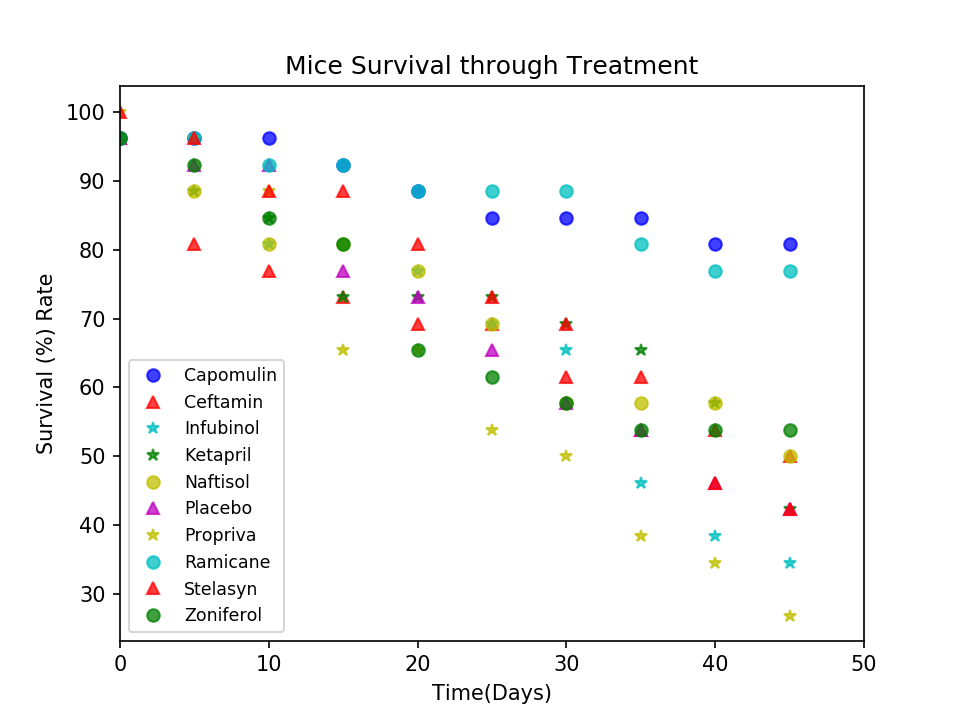

In [126]:
#Generate the plot (Metastatic Sites vs Time(Days)) with error vars
x_axis = np.arange(0,50,5)
fig, ax= plt.subplots()

ax.errorbar(x_axis,mouse_survivalrate["Capomulin"], yerr=None, xerr=None, fmt='o', color='b', alpha=0.75, label="Capomulin")
ax.errorbar(x_axis,mouse_survivalrate["Ceftamin"], yerr=None, xerr=None, fmt='^', color='r', alpha=0.75, label="Ceftamin")
ax.errorbar(x_axis,mouse_survivalrate["Infubinol"], yerr=None, xerr=None, fmt='*', color='c', alpha=0.75, label="Infubinol")
ax.errorbar(x_axis,mouse_survivalrate["Ketapril"], yerr=None, xerr=None, fmt='*', color='g', alpha=0.75, label="Ketapril")
ax.errorbar(x_axis,mouse_survivalrate["Naftisol"], yerr=None, xerr=None, fmt='o', color='y', alpha=0.75, label="Naftisol")
ax.errorbar(x_axis,mouse_survivalrate["Placebo"], yerr=None, xerr=None, fmt='^', color='m', alpha=0.75, label="Placebo")
ax.errorbar(x_axis,mouse_survivalrate["Propriva"], yerr=None, xerr=None, fmt='*',color='y', alpha=0.75, label="Propriva")
ax.errorbar(x_axis,mouse_survivalrate["Ramicane"], yerr=None, xerr=None, fmt='o', color='c', alpha=0.75, label="Ramicane")
ax.errorbar(x_axis,mouse_survivalrate["Stelasyn"], yerr=None, xerr=None, fmt='^', color='r', alpha=0.75, label="Stelasyn")
ax.errorbar(x_axis,mouse_survivalrate["Zoniferol"], yerr=None, xerr=None, fmt='o', color='g', alpha=0.75, label="Zoniferol")

ax.set_xlim(0,50)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Survival (%) Rate")
plt.title("Mice Survival through Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("Mice survival rate.png")
plt.show()

In [ ]:
'''
Figure 4 is presenting those colors representing the higher survival rate, in our graph the Ramicane and the Capomulin
users are the one on the top part of the graph, meaning the ones with higher survival level. Unfortunately, the ones
trying Propiva are declining in population in a faster rate, their survival is less than 20%.
'''

In [141]:
#Data frame with the volume change data to calculate the percent of chance in the tumor by drug used to control or 
# stop tumor growth
values

Drug                          Capomulin   Ceftamin  Infubinol   Ketapril  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          44.266086  46.503051  47.062001  47.389175   
                   10         43.084291  48.285125  49.403909  49.582269   
                   15         42.064317  50.094055  51.296397  52.399974   
                   20         40.716325  52.157049  53.197691  54.920935   
                   25         39.939528  54.287674  55.715252  57.678982   
                   30         38.769339  56.769517  58.299397  60.994507   
                   35         37.816839  58.827548  60.742461  63.371686   
                   40         36.958001  61.467895  63.162824  66.068580   
                   45         36.236114  64.132421  65.755562  70.662958   

Drug                           Naftisol    Placebo   Propriva   Ramicane  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          46.796098  47.125589  47.248967  43.944859   
                   10         48.694210  49.423329  49.101541  42.531957   
                   15         50.933018  51.359742  51.067318  41.495061   
                   20         53.644087  54.364417  53.346737  40.238325   
                   25         56.731968  57.482574  55.504138  38.974300   
                   30         59.559509  59.809063  58.196374  38.703137   
                   35         62.685087  62.420615  60.350199  37.451996   
                   40         65.600754  65.052675  63.045537  36.574081   
                   45         69.265506  68.084082  66.258529  34.955595   

Drug                           Stelasyn  Zoniferol  
                   Timepoint                        
Tumor Volume (mm3) 0          45.000000  45.000000  
                   5          47.527452  46.851818  
                   10         49.463844  48.689881  
                   15         51.529409  50.779059  
                   20         54.067395  53.170334  
                   25         56.166123  55.432935  
                   30         59.826738  57.713531  
                   35         62.440699  60.089372  
                   40         65.356386  62.916692  
                   45         68.438310  65.960888

In [192]:
#tuples to fill the change of tumor per drug and what type of drug worked better to eliminate, reduce or stop tumor growth
names=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
#tuplename=(names,heights)
tuplename=([])
height_bar=[]
for i in range(10):
    heights=((((values.iloc[9,i])-(values.iloc[0][i]))/(values.iloc[0][i]))*100)
    drug=names[i]
    height_bar.append(heights)
    tuplename.append([drug,heights])

tuplename    

[['Capomulin', -19.475302667894173],
 ['Ceftamin', 42.516491855897414],
 ['Infubinol', 46.12347172785184],
 ['Ketapril', 57.028794686606076],
 ['Naftisol', 53.92334713476923],
 ['Placebo', 51.29796048315153],
 ['Propriva', 47.24117486320634],
 ['Ramicane', -22.320900462766673],
 ['Stelasyn', 52.08513428789896],
 ['Zoniferol', 46.57975086509525]]

<IPython.core.display.Javascript object>


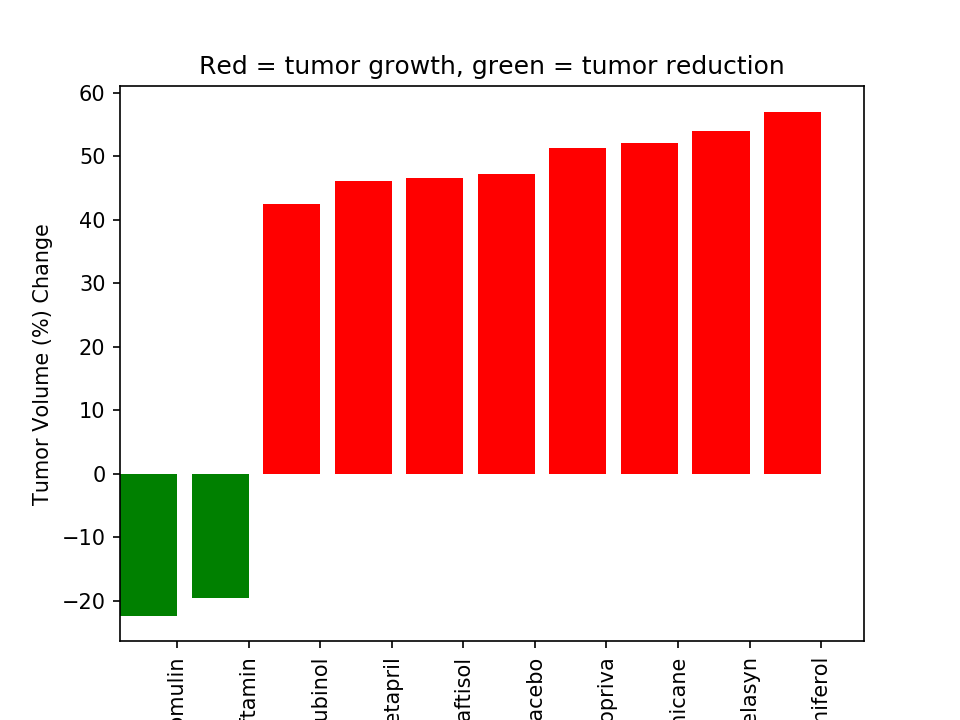

In [263]:
#Bar graph for the tumor growth.
fig, ax= plt.subplots()
width=4.0
tuplename.sort(key=lambda x: x[1], reverse=False) 

height_bar_green= height_bar[slice(0,10)]
height_bar_green.sort()

colors={0:'g',1:'g',2:'r',3:'r',4:'r',5:'r',6:'r',7:'r',9:'r',10:'r'}

VChange = ax.bar(x_axis,height_bar_green,width,color=[colors[i] for i in colors],align='center')

ax.set_xlim(-2,50)
ax.set_xlabel("Drugs Type")
ax.set_ylabel("Tumor Volume (%) Change")
plt.title("Red = tumor growth, green = tumor reduction")
#plt.legend(loc="best", fontsize="small", fancybox=True)

ax.set_xticks(x_axis + width / 2)
#ax.set_xticklabels(("Ca","Ce","In","Ke","Na","Pl","Pr","Ra","St","Zo"))
ax.set_xticklabels(("Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"), rotation=90)

# trying to label on top of the every bar its height.
'''
height=()
def autolabels(height_bar_green):
    for height in height_bar_green:
        height=height_bar_green(height)
    
    ax.text(height.get_x(), 1.05*height,
           '%d' % int(height),
           ha='center', va='bottom')
autolabels(VChange)    
'''
#Saving and printing in a file
plt.savefig("Tumor Growth and Reduction.png")
plt.show()

In [ ]:
'''
On Figure 5, the green bars represents the tumors that are not just not growthing, but actually are being
reduced, the drugs Capomulin and Ramicane are the ones eliminating the original tumor. The other ones some
slow the growth and others like Ketrapil are feeding the tumor and making growth larger than the placibo, 
where placibo is the natural tumor development.
'''